# Importing the libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

# **Data Preparation**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/DV/transactions.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#Frequency Distribution of Class

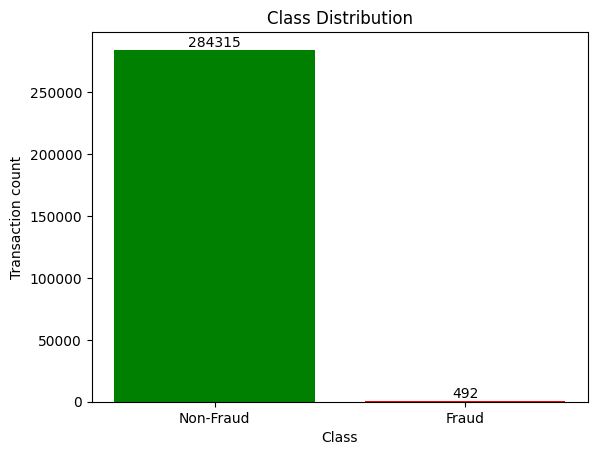

In [ ]:
import matplotlib.pyplot as plt

class_counts = df['Class'].value_counts()

#Bar chart
plt.bar(class_counts.index, class_counts.values, color=['green', 'red'])
plt.xlabel('Class')
plt.ylabel('Transaction count')
plt.title('Class Distribution')
plt.xticks(class_counts.index, ['Non-Fraud', 'Fraud'])
# Adding annotations to each bar
for i, acc in enumerate(class_counts):
    plt.text(i, acc + 0.5, acc, ha='center', va='bottom')
plt.show()

#Box Plot of Features of each Class

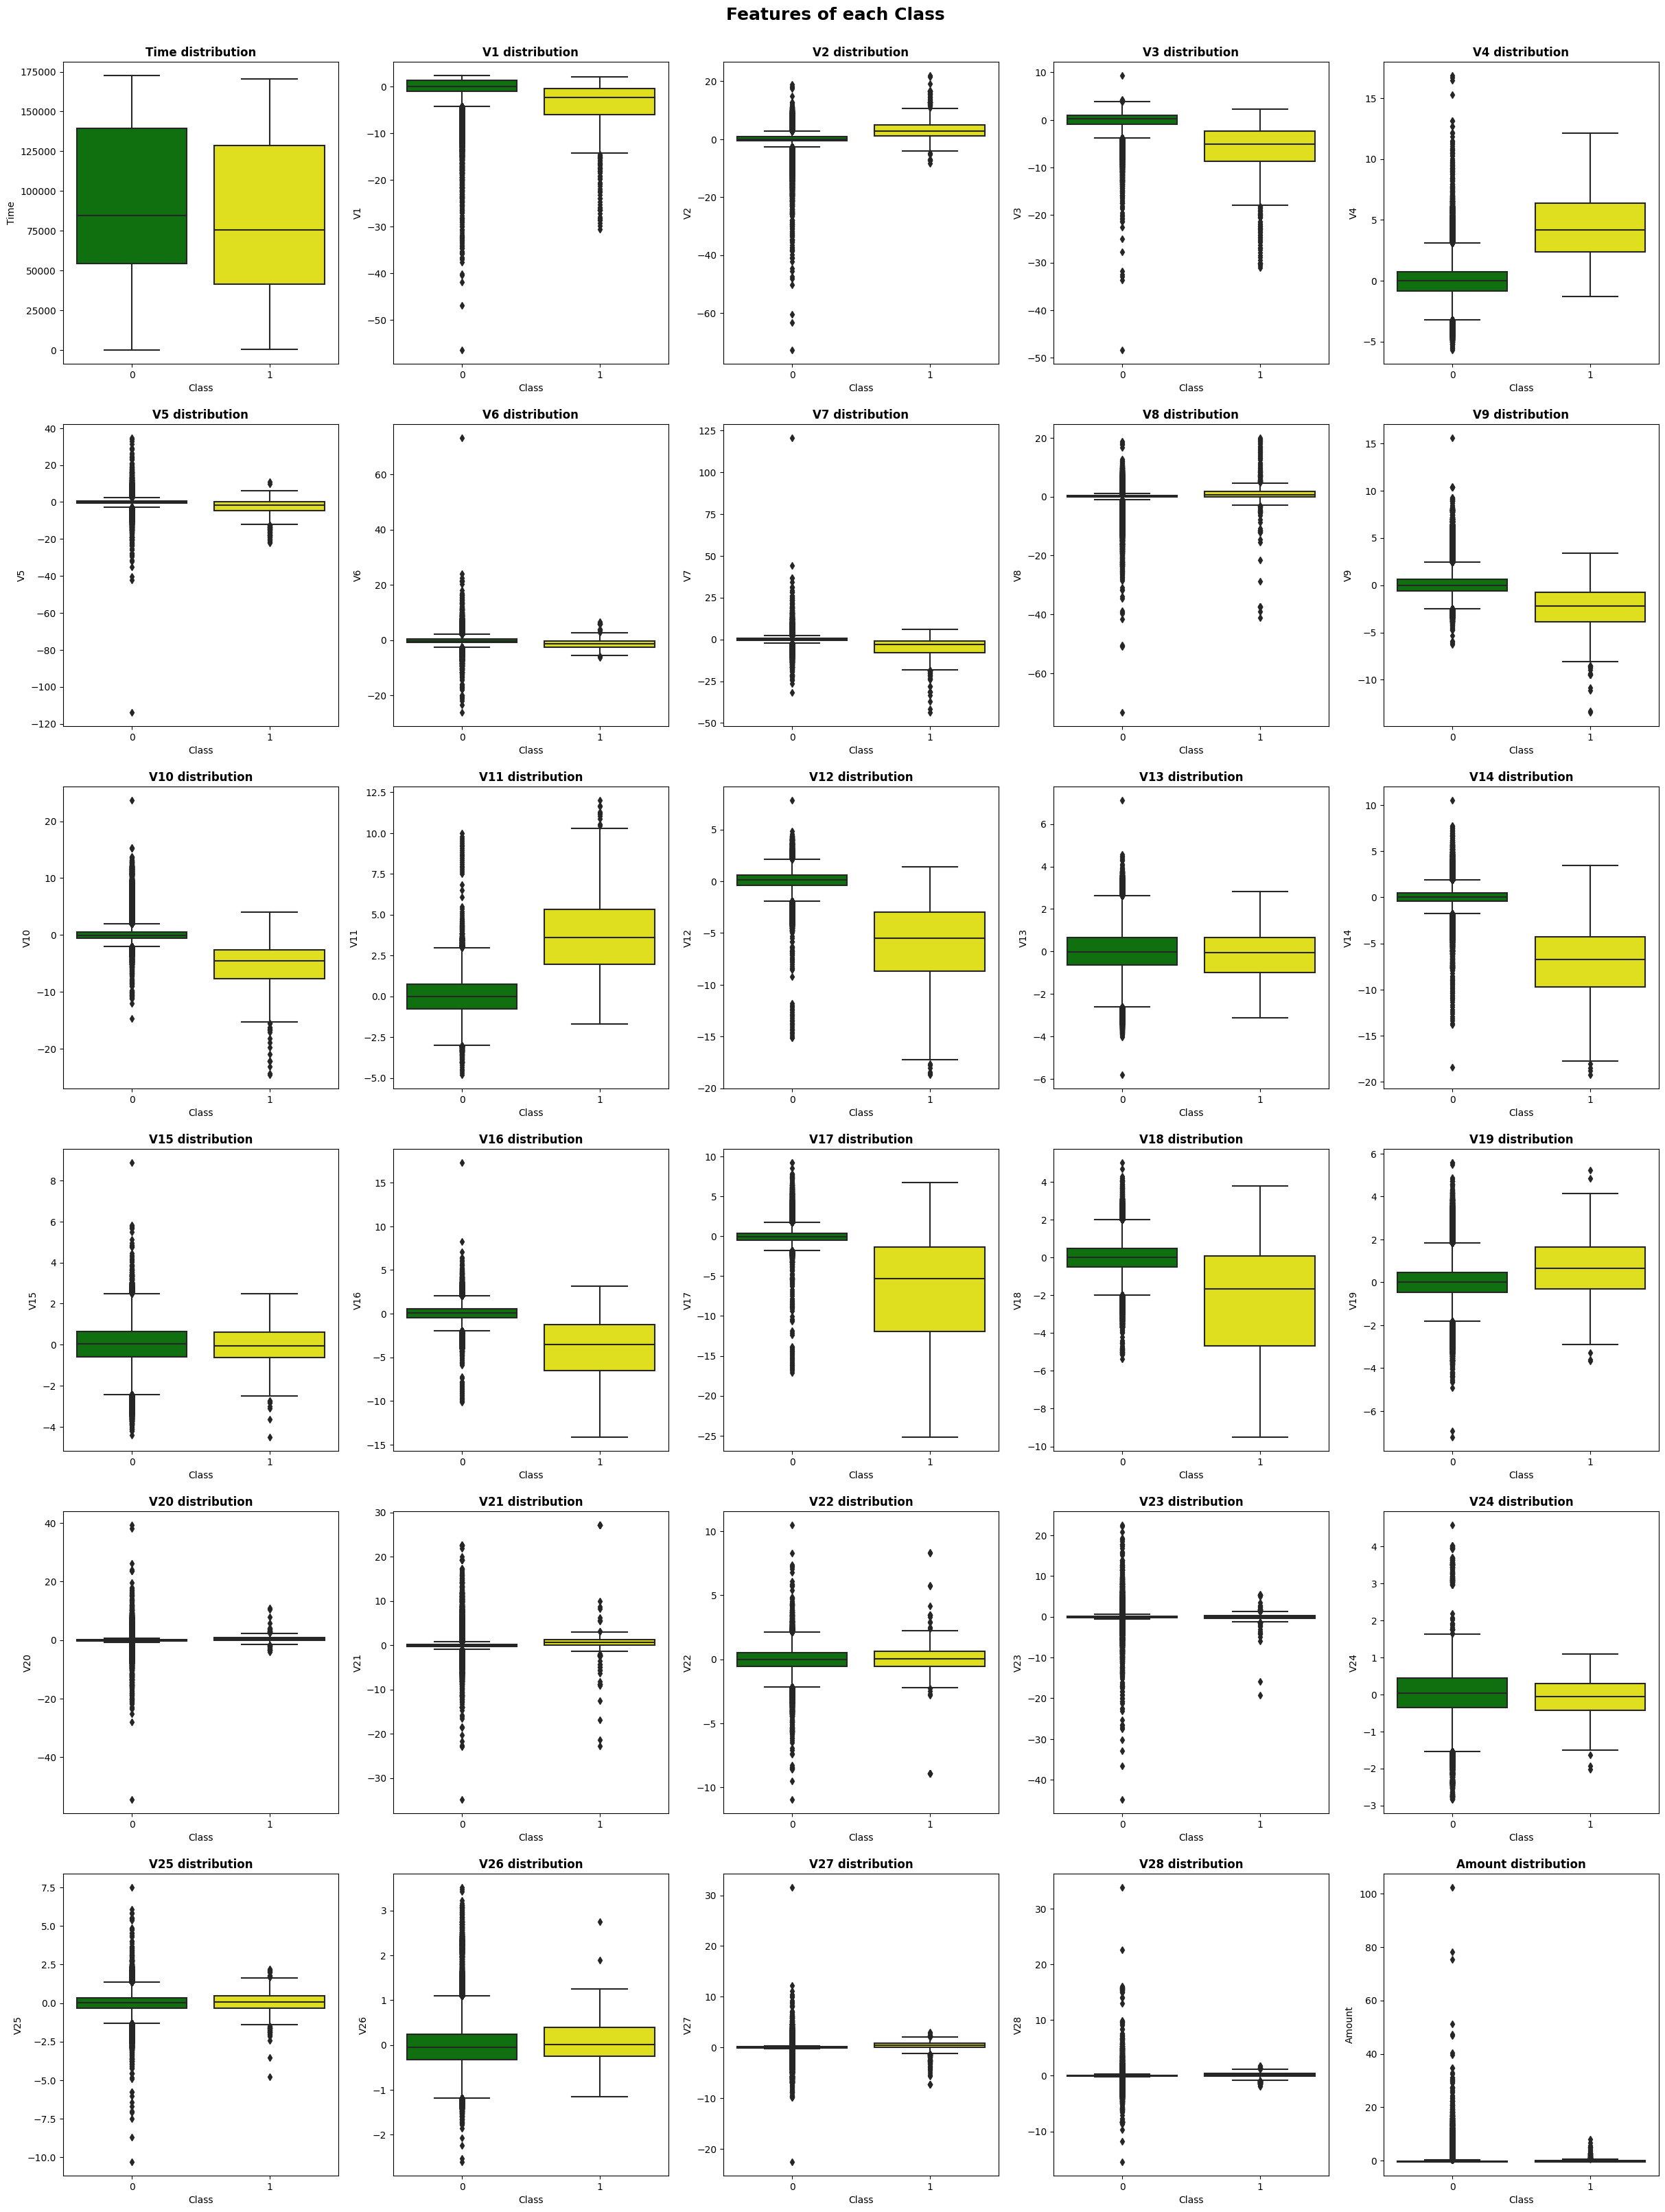

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(30,40))
fig.suptitle('Features of each Class', size = 18, y=0.9, fontweight='bold')
fila=0
colum=0

for i in df.columns[:-1]:
  sns.boxplot(ax=axes[fila,colum], data=df, x='Class', y=i, palette=['green','yellow'])
  axes[fila,colum].set_title(f"{i} distribution",fontweight='bold')
  colum= colum+1
  if colum == 5:
    colum=0
    fila+=1

#Correlation Heat Map

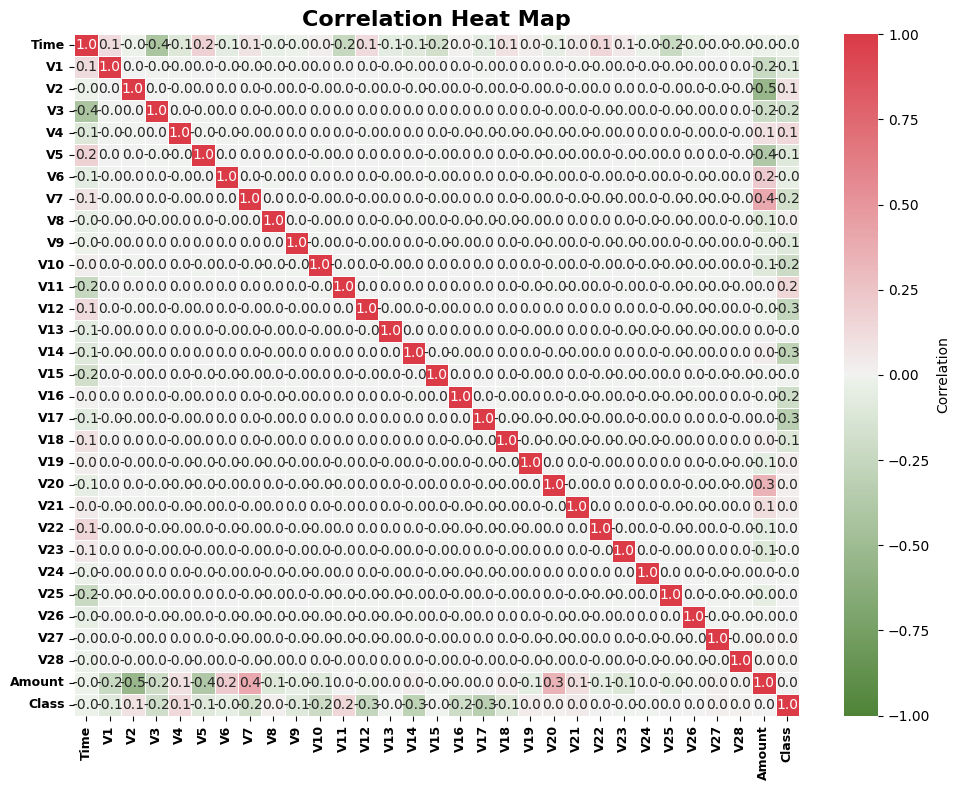

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
cmap_custom = sns.diverging_palette(120, 10, as_cmap=True)

sns.heatmap(correlation_matrix, annot=True, cmap=cmap_custom, fmt='.1f', linewidths=0.5, vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation'})

plt.title('Correlation Heat Map', fontsize=16,fontweight='bold')

plt.xticks(fontsize=9,fontweight='bold')
plt.yticks(fontsize=9,fontweight='bold')

plt.tight_layout()

plt.show()

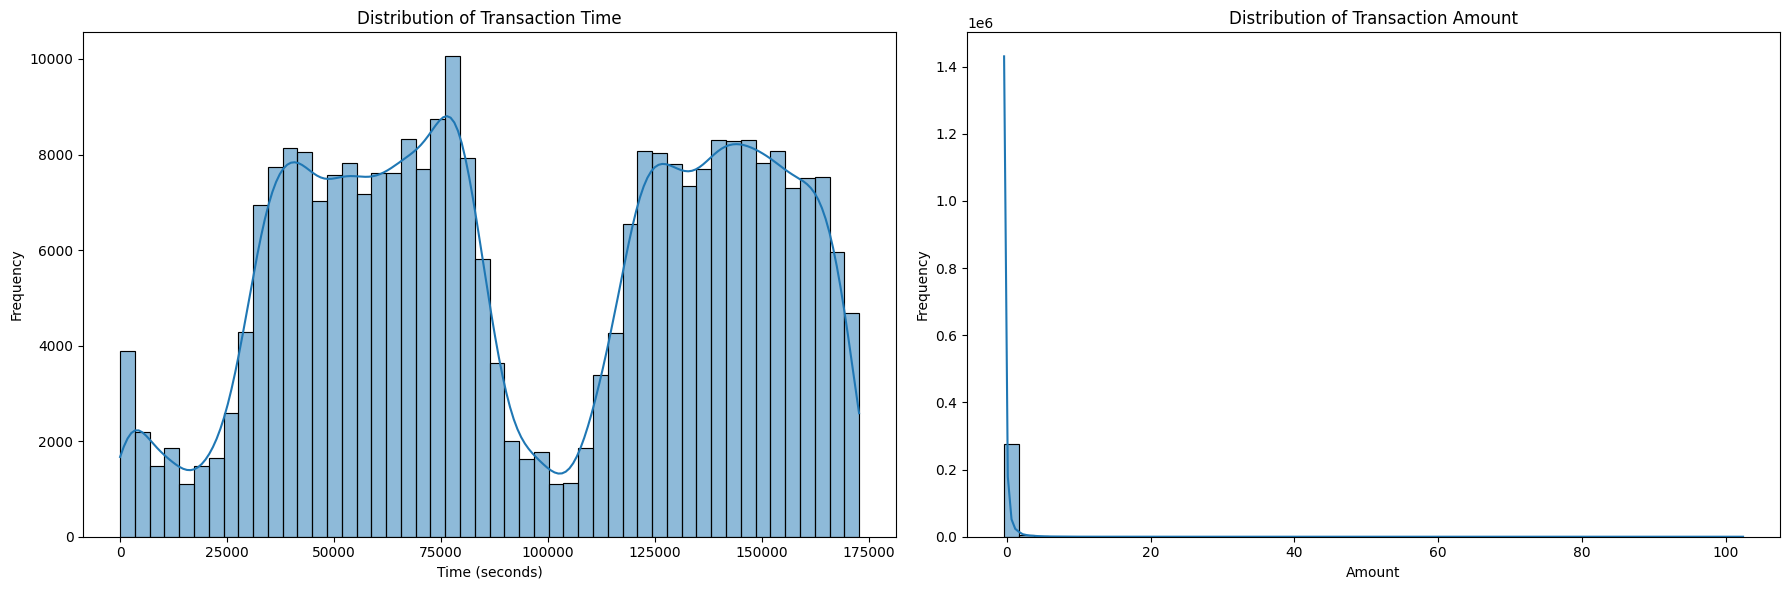

In [ ]:
# Creating subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Histogram for 'Time' feature
sns.histplot(df['Time'], bins=50, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Transaction Time')
ax[0].set_xlabel('Time (seconds)')
ax[0].set_ylabel('Frequency')

# Histogram for 'Amount' feature
sns.histplot(df['Amount'], bins=50, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Transaction Amount')
ax[1].set_xlabel('Amount')
ax[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

The histograms for the 'Time' and 'Amount' features show the following:

1. Transaction Time: The distribution of transaction times shows some periodic patterns, which could be related to daily or weekly cycles in transaction frequency. This is common in financial transaction data, where activity can vary significantly depending on the time of day or week.

2. Transaction Amount: Most transactions are of lower amounts, with the frequency rapidly decreasing as the amount increases. This long-tailed distribution is typical in financial datasets, where small transactions are common and large transactions are relatively rare.

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
df['Amount']= sc.fit_transform(pd.DataFrame(df['Amount']))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
df['Amount'].describe()

count    2.848070e+05
mean    -1.596686e-17
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

In [ ]:
df = df.drop(['Time'],axis=1)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
df.shape

(284807, 30)

In [ ]:
df.duplicated().any()

True

**REMOVE DUPLICATED VALUES**

In [ ]:
df = df.drop_duplicates()
df.shape

(275663, 30)

In [ ]:
284807 - 275663

9144

**NOT HANDLING IMBALANCED**

In [ ]:
df['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

**STORE  FEATURE  MATRIX  IN  x  AND RESPONSE  IN  VECTOR  y**

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']

# SPLITTING  THE  DATASET  INTO THE TRAINING SET AND TEST  SET

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train, y_test  = train_test_split(X,y,test_size=0.20,random_state=42)

# Handling Imbalanced Dataset

# Undersampling

In [ ]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [ ]:
normal.shape

(275190, 30)

In [ ]:
fraud.shape

(473, 30)

In [ ]:
normal_sample=normal.sample(n=473)

In [ ]:
normal_sample.shape

(473, 30)

In [ ]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [ ]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.478278,1.872233,-1.248675,-1.602380,1.549607,-1.184753,2.337972,-1.049094,1.282513,2.288424,...,-0.168881,0.852646,-0.298441,0.657866,0.029204,0.011506,0.624286,0.194931,-0.199223,0
1,2.092500,-1.006312,-1.835767,-0.672136,-0.568465,-1.470872,-0.028210,-0.383493,-0.243969,0.836672,...,0.240261,0.550606,-0.039937,-0.011346,0.243252,0.006025,-0.083359,-0.069236,-0.013952,0
2,0.311762,-2.602832,-2.942923,1.880832,-0.090804,-0.480139,1.865720,-0.549267,-0.303862,0.069705,...,0.718151,0.220383,-0.913711,-0.332605,0.278026,-0.474820,-0.200782,0.073386,3.233054,0
3,-0.625405,0.069174,-1.475244,-2.459043,2.304930,3.373235,0.033103,1.197842,-1.841251,-0.157792,...,-0.348845,-0.877869,0.167975,0.682458,-0.342840,0.450133,-0.034917,0.067017,-0.085478,0
4,2.095020,0.040510,-1.847722,0.338714,0.574470,-0.840730,0.485067,-0.340795,0.577797,-0.077917,...,-0.013551,0.188564,0.062087,0.630235,0.386115,-0.243627,-0.036975,-0.061877,-0.349231,0


In [ ]:
new_data.shape

(946, 30)

In [ ]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

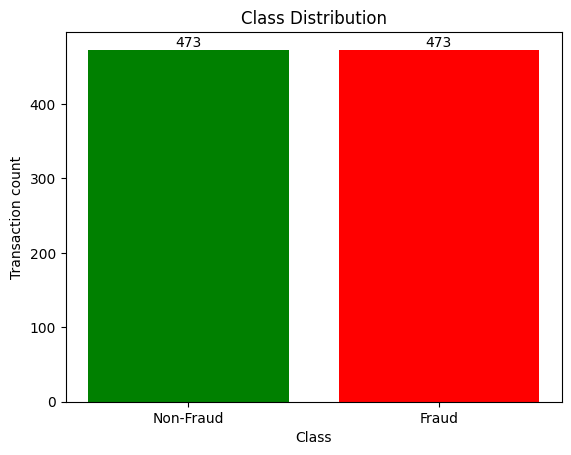

In [ ]:
import matplotlib.pyplot as plt

class_counts = new_data['Class'].value_counts()

#Bar chart
plt.bar(class_counts.index, class_counts.values, color=['green', 'red'])
plt.xlabel('Class')
plt.ylabel('Transaction count')
plt.title('Class Distribution')
plt.xticks(class_counts.index, ['Non-Fraud', 'Fraud'])
# Adding annotations to each bar
for i, acc in enumerate(class_counts):
    plt.text(i, acc + 0.5, acc, ha='center', va='bottom')
plt.show()

In [ ]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.900368,-0.754937,-0.029267,0.455184,-0.966945,0.332113,-1.208030,0.462351,1.537534,0.225682,...,0.034383,0.074968,0.371245,0.640507,-0.647078,0.133690,-0.012905,-0.042023,-0.293258,0
1,1.342034,-0.601087,-0.397937,-0.770990,-0.475795,-0.685272,-0.072419,-0.243450,-0.945197,0.663080,...,-0.837065,-2.191765,0.112161,-0.662780,0.072125,0.680915,-0.095004,0.009330,-0.033502,0
2,1.956950,-0.001275,-1.813899,0.603469,0.028823,-1.554520,0.277435,-0.351745,0.737834,-0.507092,...,0.209335,0.615825,-0.053269,-0.052135,0.198322,-0.105898,-0.017494,-0.022135,-0.136293,0
3,1.337227,0.290879,-0.387485,0.166632,0.567025,0.250590,-0.025959,0.030460,-0.171999,-0.123140,...,-0.345309,-1.001003,-0.100966,-1.427895,0.431179,0.182841,-0.026243,0.003852,-0.349831,0
4,1.507577,-1.024466,0.559104,-1.413875,-1.543809,-0.704107,-1.066982,-0.159086,-1.726180,1.407877,...,-0.385481,-0.777162,0.125373,-0.018079,0.177906,-0.389423,0.041005,0.028210,-0.258875,0


In [ ]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy1 = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy1, precision, recall, f1]
})
metrics_df

,Metric,Score
0,Accuracy,0.947368
1,Precision,0.989362
2,Recall,0.911765
3,F1 Score,0.948980


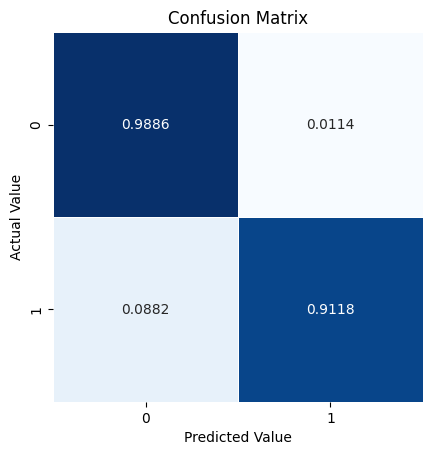

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


sns.heatmap(conf_matrix_norm, annot=True, fmt='.4f', cmap='Blues', cbar=False, linewidths=.5, square=True)

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

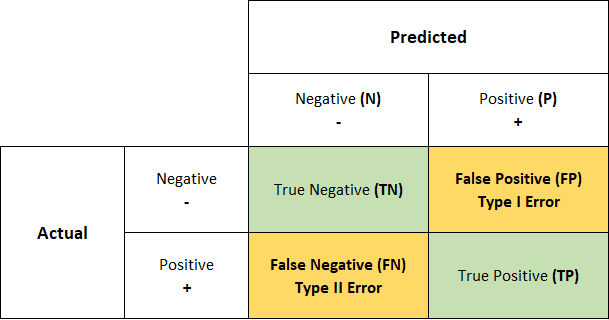

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2 = dt.predict(X_test)

In [ ]:
# Calculate evaluation metrics
accuracy2 = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy2, precision, recall, f1]
})

print(metrics_df)

      Metric     Score
0   Accuracy  0.900000
1  Precision  0.902913
2     Recall  0.911765
3   F1 Score  0.907317


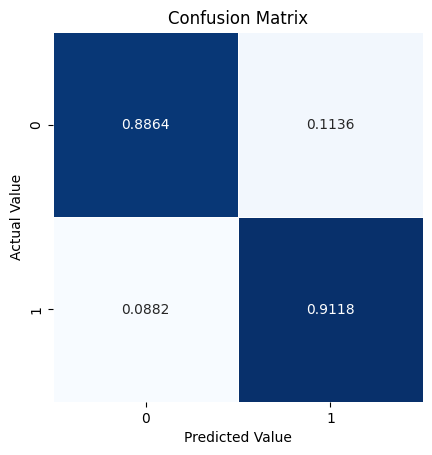

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


sns.heatmap(conf_matrix_norm, annot=True, fmt='.4f', cmap='Blues', cbar=False, linewidths=.5, square=True)

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test)

In [ ]:
# Calculate evaluation metrics
accuracy3 = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy3, precision, recall, f1]
})

print(metrics_df)

      Metric     Score
0   Accuracy  0.936842
1  Precision  0.978723
2     Recall  0.901961
3   F1 Score  0.938776


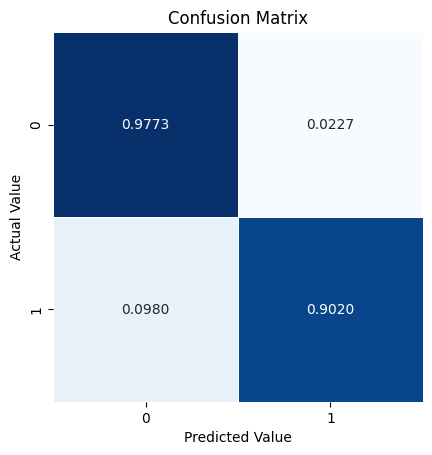

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


sns.heatmap(conf_matrix_norm, annot=True, fmt='.4f', cmap='Blues', cbar=False, linewidths=.5, square=True)

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

# Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = keras.Sequential([
    keras.layers.Dense(units=128, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
19/19 [==============================] - 2s 16ms/step - loss: 0.4642 - accuracy: 0.8477 - val_loss: 0.3449 - val_accuracy: 0.8882
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 0.2727 - accuracy: 0.9089 - val_loss: 0.2432 - val_accuracy: 0.9079
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 0.2114 - accuracy: 0.9305 - val_loss: 0.1891 - val_accuracy: 0.9145
Epoch 4/10
19/19 [==============================] - 0s 8ms/step - loss: 0.1851 - accuracy: 0.9371 - val_loss: 0.1682 - val_accuracy: 0.9211
Epoch 5/10
19/19 [==============================] - 0s 10ms/step - loss: 0.1699 - accuracy: 0.9437 - val_loss: 0.1462 - val_accuracy: 0.9539
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 0.1563 - accuracy: 0.9470 - val_loss: 0.1360 - val_accuracy: 0.9474
Epoch 7/10
19/19 [==============================] - 0s 5ms/step - loss: 0.1446 - accuracy: 0.9487 - val_loss: 0.1294 - val_accuracy: 0.9539
Epoch 8/10
19/19 [

In [ ]:
# Make predictions on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred4 = (y_pred_proba > 0.5).astype(int)

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate the model
accuracy4 = accuracy_score(y_test, y_pred4)
accuracy4

0.9368421052631579

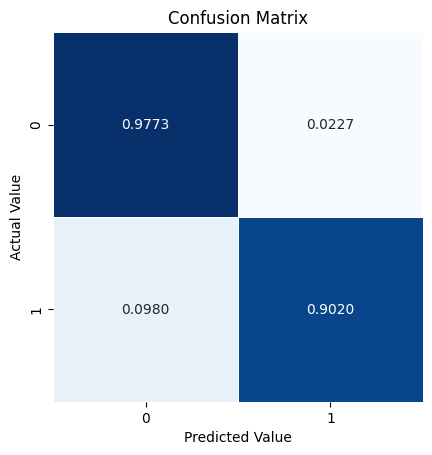

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred4)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


sns.heatmap(conf_matrix_norm, annot=True, fmt='.4f', cmap='Blues', cbar=False, linewidths=.5, square=True)

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Make predictions on the test data
y_pred5 = gb_classifier.predict(X_test)

In [ ]:
# Calculate evaluation metrics
accuracy5 = accuracy_score(y_test, y_pred5)
precision_gb = precision_score(y_test, y_pred5)
recall_gb = recall_score(y_test, y_pred5)
f1_gb = f1_score(y_test, y_pred5)

# Display the metrics
metrics_gb_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy5, precision_gb, recall_gb, f1_gb]
})

print(metrics_gb_df)

      Metric     Score
0   Accuracy  0.931579
1  Precision  0.968421
2     Recall  0.901961
3   F1 Score  0.934010


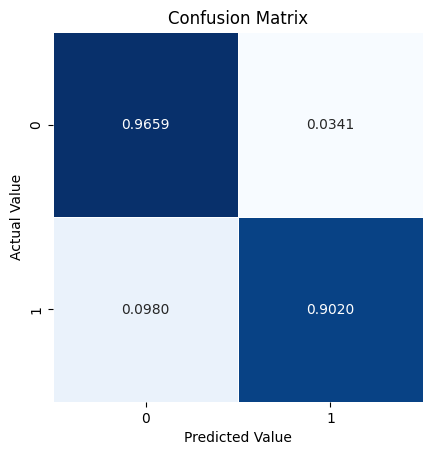

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred5)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


sns.heatmap(conf_matrix_norm, annot=True, fmt='.4f', cmap='Blues', cbar=False, linewidths=.5, square=True)

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

# Results

In [ ]:
final_data = pd.DataFrame({'Models':['LR','DT','RF','ANN','GB'],
              "ACC":[accuracy1*100,
                     accuracy2*100,
                     accuracy3*100,
                     accuracy4*100,
                     accuracy5*100,
                    ]})

In [ ]:
final_data

,Models,ACC
0,LR,94.736842
1,DT,90.000000
2,RF,93.684211
3,ANN,93.684211
4,GB,93.157895


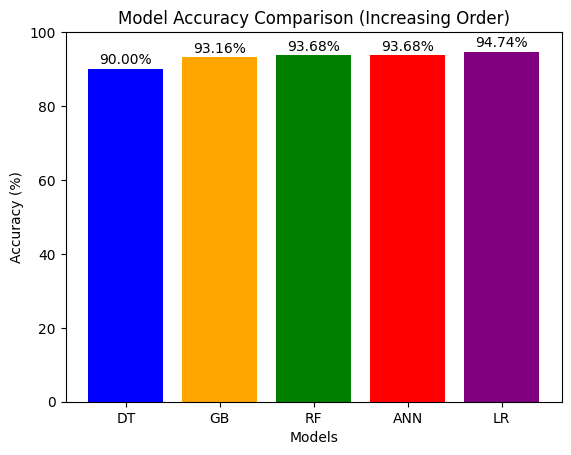

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'ACC' column in ascending order
final_data_sorted = final_data.sort_values(by='ACC')

# Plotting the bar chart
plt.bar(final_data_sorted['Models'], final_data_sorted['ACC'], color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison (Increasing Order)')
plt.ylim(0, 100)  # Set the y-axis limits to ensure proper visualization of percentages

# Adding annotations to each bar
for i, acc in enumerate(final_data_sorted['ACC']):
    plt.text(i, acc + 0.5, f'{acc:.2f}%', ha='center', va='bottom')

plt.show()

# Oversampling

In [ ]:
X = df.drop('Class', axis=1)

In [ ]:
y=df['Class']

In [ ]:
X.shape

(275663, 29)

In [ ]:
y.shape

(275663,)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

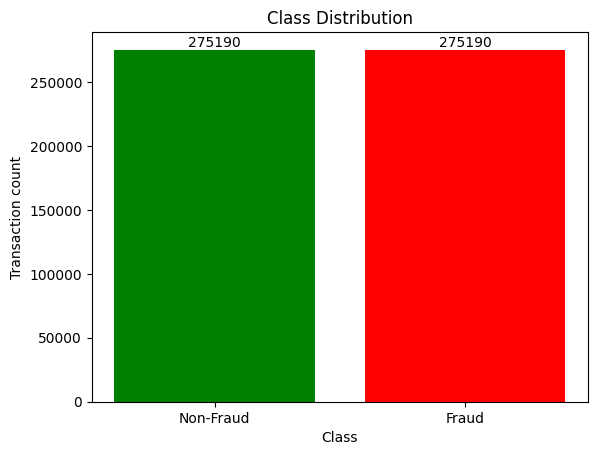

In [ ]:
import matplotlib.pyplot as plt

class_counts = y_res.value_counts()

#Bar chart
plt.bar(class_counts.index, class_counts.values, color=['green', 'red'])
plt.xlabel('Class')
plt.ylabel('Transaction count')
plt.title('Class Distribution')
plt.xticks(class_counts.index, ['Non-Fraud', 'Fraud'])
# Adding annotations to each bar
for i, acc in enumerate(class_counts):
    plt.text(i, acc + 0.5, acc, ha='center', va='bottom')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy1 = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy1, precision, recall, f1]
})
metrics_df

,Metric,Score
0,Accuracy,0.944148
1,Precision,0.973062
2,Recall,0.913514
3,F1 Score,0.942348


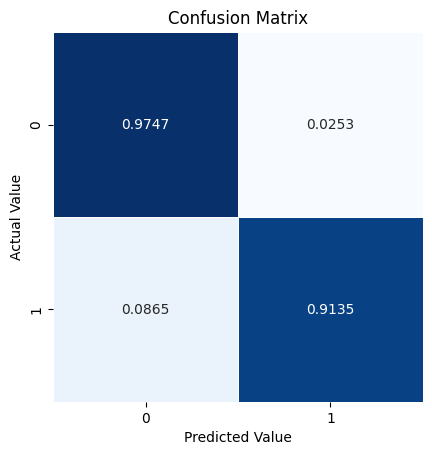

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


sns.heatmap(conf_matrix_norm, annot=True, fmt='.4f', cmap='Blues', cbar=False, linewidths=.5, square=True)

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2 = dt.predict(X_test)

In [ ]:
# Calculate evaluation metrics
accuracy2 = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy2, precision, recall, f1]
})

print(metrics_df)

      Metric     Score
0   Accuracy  0.997892
1  Precision  0.996915
2     Recall  0.998873
3   F1 Score  0.997893


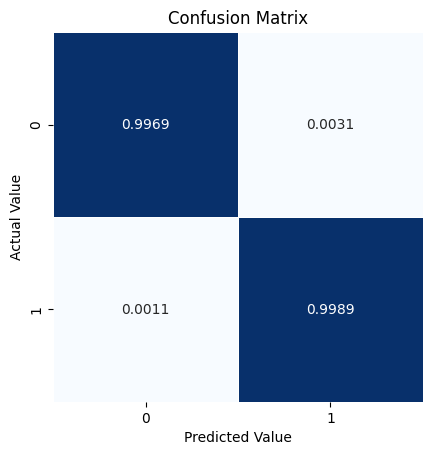

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


sns.heatmap(conf_matrix_norm, annot=True, fmt='.4f', cmap='Blues', cbar=False, linewidths=.5, square=True)

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test)

In [ ]:
# Calculate evaluation metrics
accuracy3 = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy3, precision, recall, f1]
})

print(metrics_df)

      Metric     Score
0   Accuracy  0.999927
1  Precision  0.999855
2     Recall  1.000000
3   F1 Score  0.999927


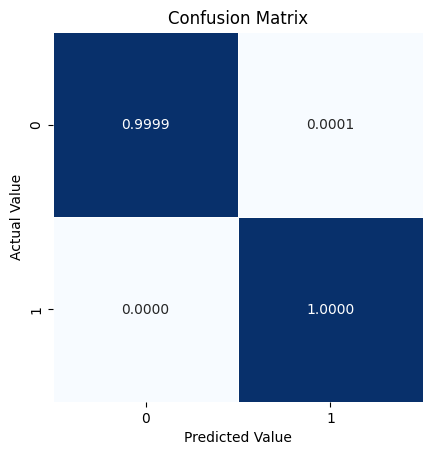

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


sns.heatmap(conf_matrix_norm, annot=True, fmt='.4f', cmap='Blues', cbar=False, linewidths=.5, square=True)

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

# Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = keras.Sequential([
    keras.layers.Dense(units=128, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
11008/11008 [==============================] - 31s 3ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0077 - val_accuracy: 0.9981
Epoch 2/10
11008/11008 [==============================] - 30s 3ms/step - loss: 0.0078 - accuracy: 0.9979 - val_loss: 0.0052 - val_accuracy: 0.9986
Epoch 3/10
11008/11008 [==============================] - 29s 3ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0077 - val_accuracy: 0.9976
Epoch 4/10
11008/11008 [==============================] - 31s 3ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0037 - val_accuracy: 0.9991
Epoch 5/10
11008/11008 [==============================] - 31s 3ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0053 - val_accuracy: 0.9988
Epoch 6/10
11008/11008 [==============================] - 31s 3ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 7/10
11008/11008 [==============================] - 48s 4ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0

In [ ]:
# Make predictions on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred4 = (y_pred_proba > 0.5).astype(int)

3440/3440 [==============================] - 5s 1ms/step


In [ ]:
# Evaluate the model
accuracy4 = accuracy_score(y_test, y_pred4)
accuracy4

0.9993731603619318

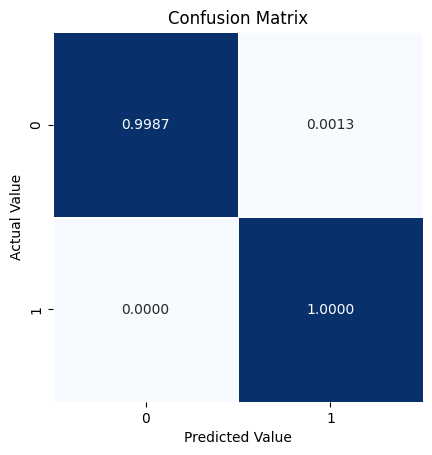

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred4)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


sns.heatmap(conf_matrix_norm, annot=True, fmt='.4f', cmap='Blues', cbar=False, linewidths=.5, square=True)

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Make predictions on the test data
y_pred5 = gb_classifier.predict(X_test)

In [ ]:
# Calculate evaluation metrics
accuracy5 = accuracy_score(y_test, y_pred5)
precision_gb = precision_score(y_test, y_pred5)
recall_gb = recall_score(y_test, y_pred5)
f1_gb = f1_score(y_test, y_pred5)

# Display the metrics
metrics_gb_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy5, precision_gb, recall_gb, f1_gb]
})

print(metrics_gb_df)

      Metric     Score
0   Accuracy  0.976353
1  Precision  0.986266
2     Recall  0.966129
3   F1 Score  0.976094


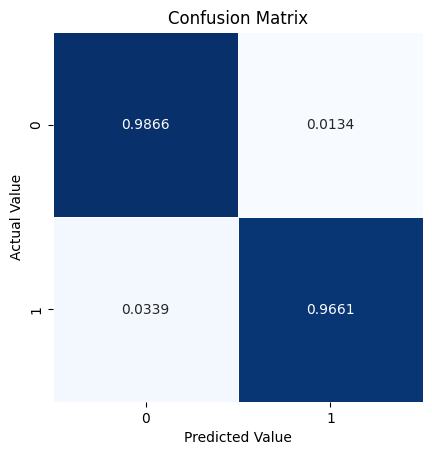

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred5)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


sns.heatmap(conf_matrix_norm, annot=True, fmt='.4f', cmap='Blues', cbar=False, linewidths=.5, square=True)

plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.show()

#Results

In [ ]:
final_data = pd.DataFrame({'Models':['LR','DT','RF','ANN','GB'],
              "ACC":[accuracy1*100,
                     accuracy2*100,
                     accuracy3*100,
                     accuracy4*100,
                     accuracy5*100,
                    ]})

In [ ]:
final_data

,Models,ACC
0,LR,94.414768
1,DT,99.789237
2,RF,99.992732
3,ANN,99.937316
4,GB,97.635270


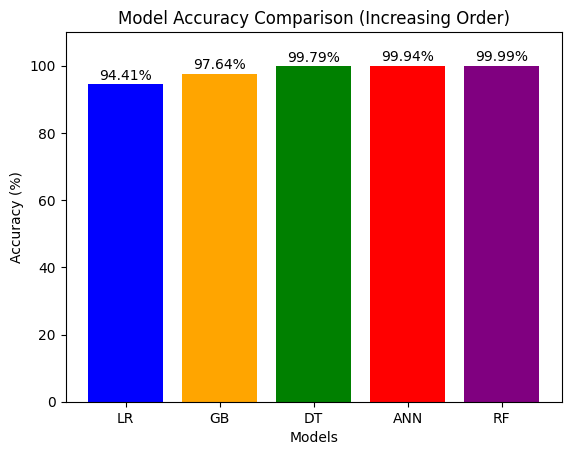

In [ ]:
import matplotlib.pyplot as plt

# Sort the DataFrame by the 'ACC' column in ascending order
final_data_sorted = final_data.sort_values(by='ACC')

# Plotting the bar chart
plt.bar(final_data_sorted['Models'], final_data_sorted['ACC'], color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison (Increasing Order)')
plt.ylim(0, 110)  # Set the y-axis limits to ensure proper visualization of percentages

# Adding annotations to each bar
for i, acc in enumerate(final_data_sorted['ACC']):
    plt.text(i, acc + 0.5, f'{acc:.2f}%', ha='center', va='bottom')

plt.show()